In [2]:
import numpy as np
import pandas as pd
# Ploting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
%config InlineBackend.figure_formats = ['svg']

In [3]:
import numpy as np
from scipy.ndimage import convolve
from scipy.ndimage import laplace

# Define the function u(x, t)
def u(x, t):
    return (np.sin(np.pi * x) * np.cos(np.pi * t))/2 + (np.sin(3*np.pi * x) * np.cos(3*np.pi * t))/3

# Define function to calculate Laplacian using finite differences
# def laplacian_2d(u, dx, axis):
#     u_xx = np.diff(u, n=2, axis=axis) / dx**2
#     return u_xx

def laplacien(u):
  return laplace(u)
# Parameters
n_points = 1000
n1 = 0.5
n2 = 0.5

x = np.linspace(0, 10, n_points)
t = np.linspace(0, 10, n_points)
x.sort()

# Calculate derivatives for du/dt and du/dx
dt = 0.01
dx = x[1] - x[0]
du_dt_values = (u(x, t + dt) - u(x, t)) / dt
du_dx_values = np.gradient(u(x, t), dx)
u_values = u(x,t)
laplace_values = laplacien(u_values)
# Calculate du/dn using du/dx and du/dt
du_dn_values = du_dx_values * n1 + du_dt_values * n2
gamma_values = -du_dn_values / u_values
alpha_values = -u_values / du_dn_values
# alpha_values = -u_values / (du_dn_values +1e-10)

<ipython-input-3-5cd84d367bae>:34: RuntimeWarning: divide by zero encountered in divide
  gamma_values = -du_dn_values / u_values


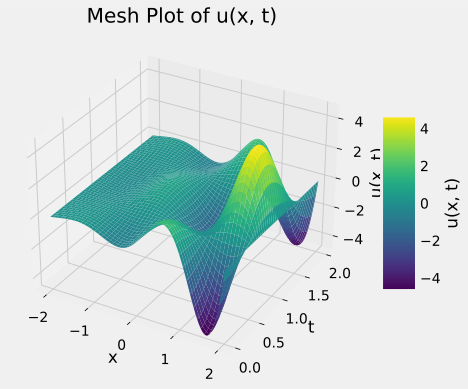

In [4]:
def u_function(x, t):
    return np.exp(x) * np.sin(np.pi * x) * np.cos(np.pi * t)
x = np.linspace(-2, 2, 100)
t = np.linspace(0, 2, 100)
x, t = np.meshgrid(x, t)
u_f = u_function(x, t)

# Create mesh plot with enhanced styling
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Mesh plot with colormap and shading
mesh = ax.plot_surface(x, t, u_f, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
ax.set_title('Mesh Plot of u(x, t)')

# Customize colorbar
cbar = fig.colorbar(mesh, shrink=0.5, aspect=5)
cbar.set_label('u(x, t)')

plt.show()

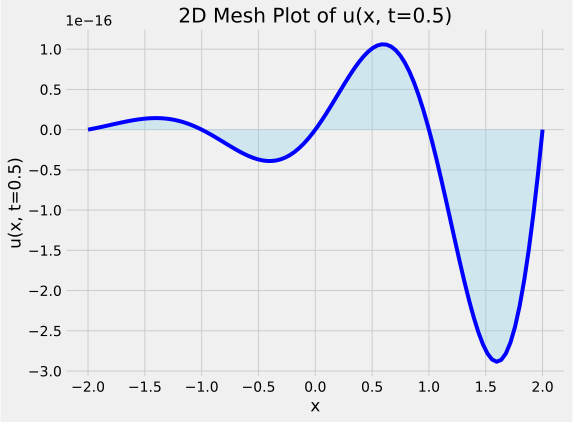

In [5]:
# Fixed value of t for the 2D mesh plot
t_val = 0.5

# Create a grid of x values for the 2D mesh plot
x_values = np.linspace(-2, 2, 100)

# Evaluate u(x, t) for the specified t value
u_values = u_function(x_values, t_val)

# Create 2D mesh plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, u_values, color='blue')
plt.fill_between(x_values, u_values, color='skyblue', alpha=0.3)  # Fill area under the curve

plt.xlabel('x')
plt.ylabel('u(x, t=0.5)')
plt.title('2D Mesh Plot of u(x, t=0.5)')

plt.grid(True)
plt.show()

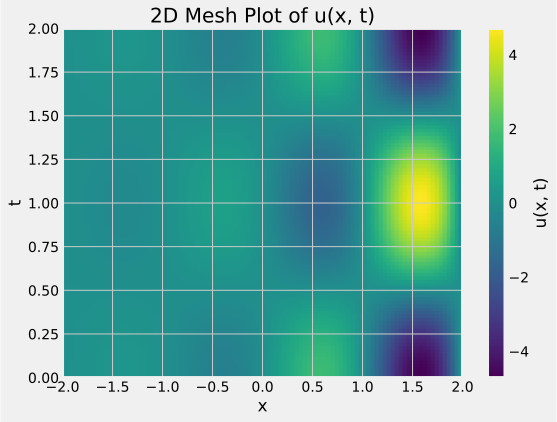

In [6]:
x = np.linspace(-2, 2, 100)
t = np.linspace(0, 2, 100)

# Create mesh grid
x, t = np.meshgrid(x, t)
u_f = u_function(x, t)

# Plot the 2D mesh with different colors for different time slices
plt.figure(figsize=(8, 6))
plt.imshow(u_f, extent=[min(x[0]), max(x[0]), min(t[:, 0]), max(t[:, 0])], aspect='auto', cmap='viridis')
plt.colorbar(label='u(x, t)')

plt.xlabel('x')
plt.ylabel('t')
plt.title('2D Mesh Plot of u(x, t)')

plt.show()

In [10]:
import sympy as sp

x, t = sp.symbols('x t')
u = (sp.sin(sp.pi * x) * sp.cos(sp.pi * t))/2 + (sp.sin(3*sp.pi * x) * sp.cos(3*sp.pi * t))/3

gradient_u = [sp.diff(u, x), sp.diff(u, t)]

n1, n2 = sp.symbols('n1 n2')
n = sp.Matrix([n1, n2])

du_dn = sp.Matrix(gradient_u).dot(n)

print("du/dn =", du_dn)

du/dn = n1*(pi*cos(pi*t)*cos(pi*x)/2 + pi*cos(3*pi*t)*cos(3*pi*x)) + n2*(-pi*sin(pi*t)*sin(pi*x)/2 - pi*sin(3*pi*t)*sin(3*pi*x))


<ipython-input-13-f8173f73ea5a>:30: RuntimeWarning: divide by zero encountered in divide
  gamma_values = - Du_dn_values / U_values


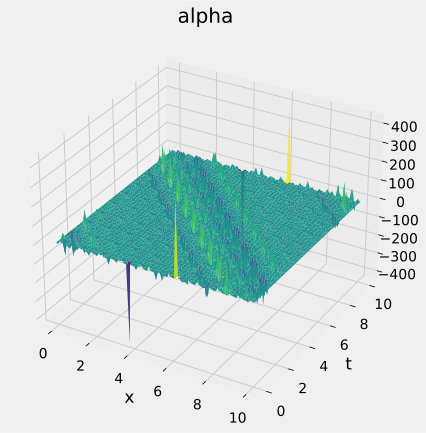

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import laplace

# Define the function u(x, t)
def u(x, t):
    return (np.sin(np.pi * x) * np.cos(np.pi * t))/2 + (np.sin(3*np.pi * x) * np.cos(3*np.pi * t))/3

# Define function to calculate Laplacian using finite differences
def laplacien(u):
    return laplace(u)

# Parameters and grid creation
n_points = 100
n1 = 0.5
n2 = 0.5
x = np.linspace(0, 10, n_points)
t = np.linspace(0, 10, n_points)
X, T = np.meshgrid(x, t)

# Calculate function values on the 2D grid
U_values = u(X, T)
Laplace_values = laplacien(U_values)
Du_dx_values = np.gradient(U_values, axis=0)
Du_dt_values = np.gradient(U_values, axis=1)
Du_dn_values = Du_dx_values * n1 + Du_dt_values * n2

# Calculate gamma and alpha values
gamma_values = - Du_dn_values / U_values
alpha_values = -U_values /Du_dn_values

# Plotting functions on 3D surfaces with meshgrid
fig = plt.figure(figsize=(12, 18))

# ... (previous code for plotting other functions remains the same)

# Plot alpha
ax6 = fig.add_subplot(326, projection='3d')
ax6.plot_surface(X, T, alpha_values, cmap='viridis')
ax6.set_title('alpha')
ax6.set_xlabel('x')
ax6.set_ylabel('t')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


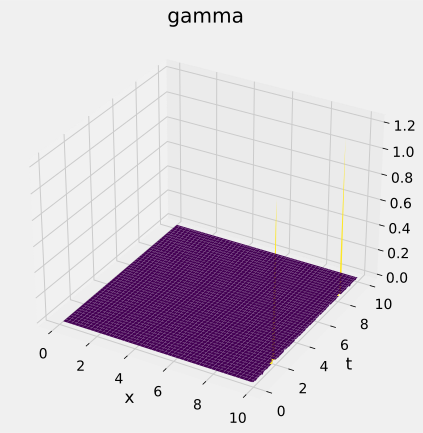

In [14]:
# Plotting functions on 3D surfaces with meshgrid
fig = plt.figure(figsize=(12, 18))

# ... (code for plotting other functions remains the same as previous)

# Plot gamma
ax6 = fig.add_subplot(326, projection='3d')
ax6.plot_surface(X, T, gamma_values, cmap='viridis')
ax6.set_title('gamma')
ax6.set_xlabel('x')
ax6.set_ylabel('t')

plt.tight_layout()
plt.show()


In [28]:
df = pd.DataFrame({'x': x , 't': t , 'u(x,t)':u_values  , 'Alpha': alpha_values , 'Gamma': gamma_values})
csv_file_path = 'Gamma_x.csv'
df.to_csv(csv_file_path , index=False)
df = pd.read_csv(csv_file_path)
df

,x,t,"u(x,t)",Alpha,Gamma
0,0.00000,0.00000,0.000000e+00,-0.000000e+00,-inf
1,0.01001,0.01001,4.697443e-02,-2.046738e-02,-4.885823e+01
2,0.02002,0.02002,9.277707e-02,-4.299980e-02,-2.325592e+01
3,0.03003,0.03003,1.362758e-01,-7.029573e-02,-1.422561e+01
4,0.04004,0.04004,1.764162e-01,-1.072143e-01,-9.327113e+00
...,...,...,...,...,...
995,9.95996,9.95996,-1.764162e-01,1.038231e-01,9.631765e+00
996,9.96997,9.96997,-1.362758e-01,6.880567e-02,1.453369e+01
997,9.97998,9.97998,-9.277707e-02,4.243334e-02,2.356637e+01
998,9.98999,9.98999,-4.697443e-02,2.033757e-02,4.917009e+01


In [29]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu' , input_shape=(1,)),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1) #OutPut
])

In [30]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# def mean_loss(y_true , y_pred):
#   return tf.reduce_mean(tf.square(y_true-y_pred))
model.compile(optimizer='adam' , loss='mean_squared_error')
x_train = df['x'].values
y_train = df['Gamma'].values
model.fit(x_train,y_train, epochs=60 , batch_size=32)

Epoch 1/60
32/32 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/60
32/32 [==============================] - 0s 2ms/step - loss: nan
Epoch 14

In [31]:
x_pred = df['x'].values
y_pred = df['Gamma'].values

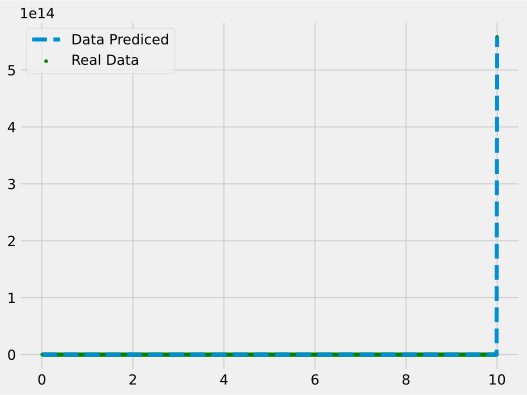

In [33]:
plt.plot(x_pred, y_pred, '--', label='Data Prediced')
plt.scatter(x_train, y_train, s=10, c='g', label='Real Data')
_ = plt.legend(loc='best')

In [35]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# def mean_loss(y_true , y_pred):
#   return tf.reduce_mean(tf.square(y_true-y_pred))
model.compile(optimizer='adam' , loss='mean_squared_error')
x_train = df['x'].values
y_train = df['Alpha'].values
model.fit(x_train,y_train, epochs=60 , batch_size=32)

Epoch 1/60
32/32 [==============================] - 2s 6ms/step - loss: nan
Epoch 2/60
32/32 [==============================] - 0s 7ms/step - loss: nan
Epoch 3/60
32/32 [==============================] - 0s 7ms/step - loss: nan
Epoch 4/60
32/32 [==============================] - 0s 5ms/step - loss: nan
Epoch 5/60
32/32 [==============================] - 0s 8ms/step - loss: nan
Epoch 6/60
32/32 [==============================] - 0s 3ms/step - loss: nan
Epoch 7/60
32/32 [==============================] - 0s 8ms/step - loss: nan
Epoch 8/60
32/32 [==============================] - 0s 6ms/step - loss: nan
Epoch 9/60
32/32 [==============================] - 0s 6ms/step - loss: nan
Epoch 10/60
32/32 [==============================] - 0s 8ms/step - loss: nan
Epoch 11/60
32/32 [==============================] - 0s 9ms/step - loss: nan
Epoch 12/60
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 13/60
32/32 [==============================] - 0s 6ms/step - loss: nan
Epoch 14

In [36]:
x_pred = df['x'].values
y_pred = df['Alpha'].values

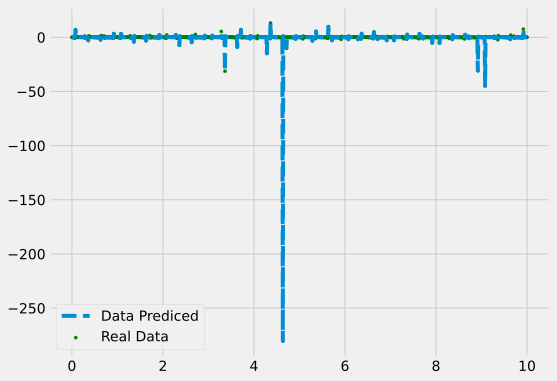

In [37]:
plt.plot(x_pred, y_pred, '--', label='Data Prediced')
plt.scatter(x_train, y_train, s=10, c='g', label='Real Data')
_ = plt.legend(loc='best')

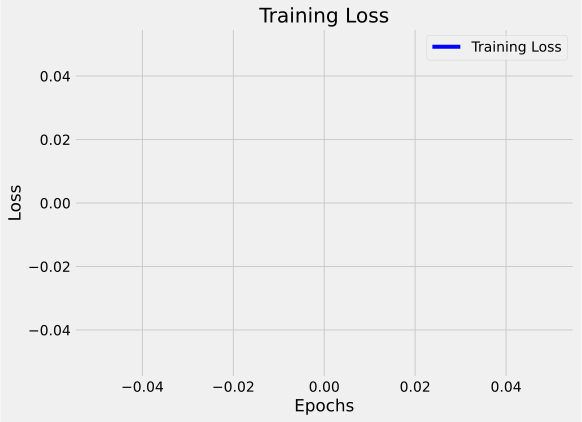

In [38]:
loss_values = []

epochs = 60
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        loss = model.train_on_batch(x_batch, y_batch)
    loss_values.append(loss)

plt.plot(range(1, epochs + 1), loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()